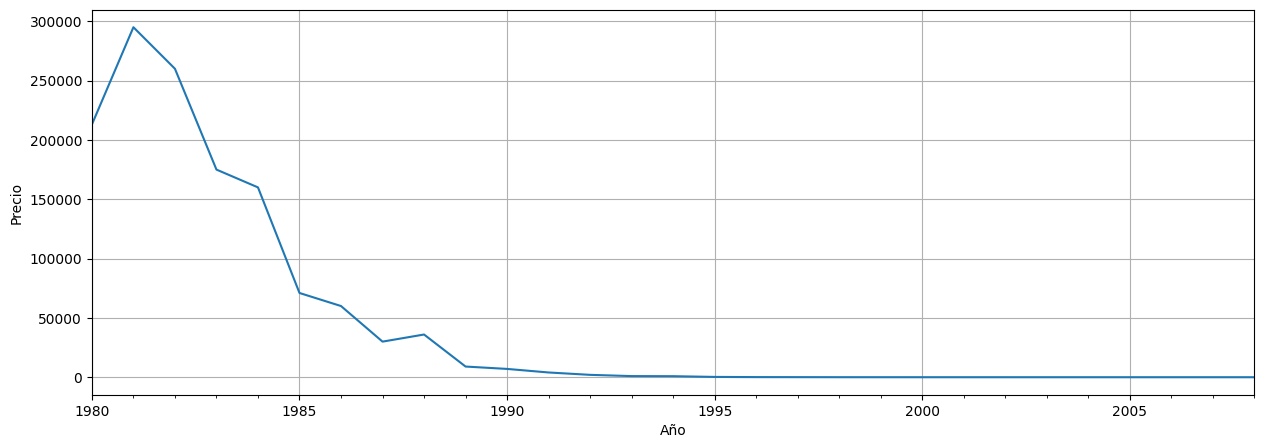

In [33]:
import matplotlib.pyplot as plt
import astsadata as astsa
import numpy as np

plt.rcParams['figure.figsize'] = [15,5]
plt.rcParams['axes.grid'] = True


jj = astsa.cpg
jj.plot(xlabel="Año", ylabel="Precio", legend=False);

1. Describir brevemente la serie observada. Argumentar que la serie presenta aproximadamente un descenso exponencial.

1. Descripción de la Serie Observada
La gráfica muestra el precio de almacenamiento en dólares por gigabyte desde 1980 hasta 2008. La serie presenta una clara tendencia descendente. En los primeros años, el costo de almacenamiento era extremadamente alto, llegando a alrededor de 300,000 dólares por gigabyte. A lo largo de la década de 1980, el precio disminuye rápidamente, y para fines de los 1990s, se estabiliza en valores mucho más bajos, acercándose a cero.

Argumento de Descenso Exponencial
Un descenso exponencial se caracteriza por una disminución rápida al inicio que se va desacelerando a medida que se avanza en el tiempo. Esto parece ser consistente con la serie observada, donde los primeros años muestran una caída abrupta en los costos, mientras que en los años posteriores la reducción es menos pronunciada.

2. Transformar la serie a escala logarítmica y graficar nuevamente. Comentar lo observado.

In [34]:
jj.head()

,value
index,
1980,213000.0
1981,295000.0
1982,260000.0
1983,175000.0
1984,160000.0


In [35]:
# Transformación logarítmica
log_prices = np.log(jj)

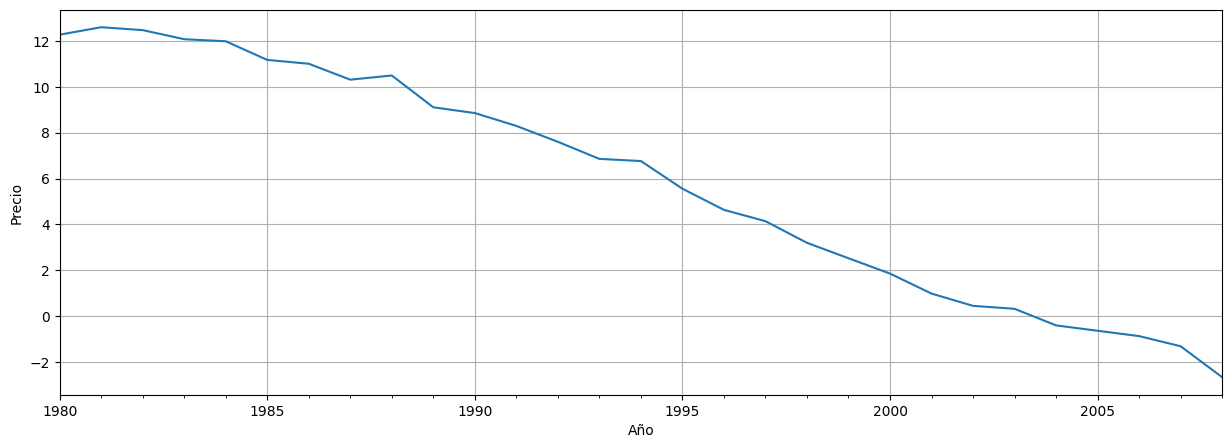

In [36]:
log_prices.plot(xlabel="Año", ylabel="Precio", legend=False);

Explicación:
Transformar la serie a escala logarítmica ayuda a visualizar mejor los datos cuando hay un descenso exponencial. En la gráfica original, los precios descienden rápidamente, y la escala logarítmica permite ver este comportamiento de manera más lineal, facilitando el ajuste de modelos lineales en los pasos posteriores.

3. Realizar una regresión lineal de la forma . 

In [37]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

time = pd.Series([idx.ordinal for idx in log_prices.index], index=log_prices.index)
data_reg = pd.concat([time, log_prices], axis=1)
data_reg.columns = ["time", "precio"]

fit = ols(formula="precio ~ time", data=data_reg).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 precio   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     1790.
Date:                Wed, 03 Jul 2024   Prob (F-statistic):           3.23e-26
Time:                        22:35:48   Log-Likelihood:                -26.396
No. Observations:                  29   AIC:                             56.79
Df Residuals:                      27   BIC:                             59.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.8914      0.352     56.587      0.000      19.170      20.613
time          -0.5851      0.014    -42.304      0.000      -0.613      -0.557
==============================================================================
Omnibus:                        4.198   Durbin-Watson:                   0.476
Prob(Omnibus):                  0.123   Jarque-Bera (JB):                2.584
Skew:                          -0.628   Prob(JB):                        0.275
Kurtosis:                       3.749   Cond. No.                         77.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Los resultados de la regresión lineal que has mostrado indican lo siguiente:

Resumen de la Regresión OLS:
Variable Dependiente y R-cuadrado:

Variable Dependiente (Dep. Variable): precio (presumiblemente el precio de algún activo).
R-cuadrado: 0.985
Interpretación: Esto significa que el 98.5% de la variabilidad en el precio (precio) puede ser explicada por la variable time en el modelo de regresión.
Estadísticas de Ajuste del Modelo:

R-cuadrado ajustado: 0.985
Estadístico F: 1790.0
Interpretación: El alto valor del estadístico F y del R-cuadrado ajustado sugieren que el modelo en general es altamente significativo.
Coeficientes:

Intercepto: 19.8914
Interpretación: Cuando time es cero, el precio (precio) estimado es aproximadamente 19.8914 unidades.
time: -0.5851
Interpretación: Por cada unidad de aumento en time, el precio (precio) estimado disminuye en 0.5851 unidades.
Significación Estadística de los Coeficientes:

P>|t| (Valor p): Para ambos coeficientes (intercepto y time), los valores p son muy pequeños (0.000), lo que indica que son estadísticamente significativos.


Otros Tests Estadísticos:

Omnibus: 4.198
Interpretación: Este test verifica la normalidad de los residuos. Un valor p mayor a 0.05 (aquí es 0.123) sugiere que los residuos podrían seguir una distribución normal.
Durbin-Watson: 0.476
Interpretación: Este estadístico detecta autocorrelación en los residuos. Valores cercanos a 2 indican ausencia de autocorrelación, mientras que aquí 0.476 sugiere posible autocorrelación positiva.
Jarque-Bera (JB): 2.584
Interpretación: Otro test de normalidad de los residuos.
Observaciones y Grados de Libertad:

No. Observaciones: 29
Df Residuals: 27
Df Model: 1
Interpretación: Hay 29 observaciones en total, y el modelo tiene 1 grado de libertad asociado a la variable time.
Tipo de Covarianza:

Tipo de Covarianza: no robusta
Interpretación: Indica que los errores estándar no están ajustados para posibles problemas de heterocedasticidad u otras medidas robustas.
Conclusión:
El análisis de regresión sugiere que hay una fuerte relación lineal entre time y el precio (precio), con time teniendo un efecto negativo significativo en el precio estimado. El modelo explica una gran parte de la variabilidad en el precio, aunque la baja estadística Durbin-Watson sugiere que podría haber autocorrelación en los residuos, lo cual debe ser considerado para una interpretación más precisa del modelo.

4. Graficar los valores ajustados y analizar los residuos y el ajuste obtenido.

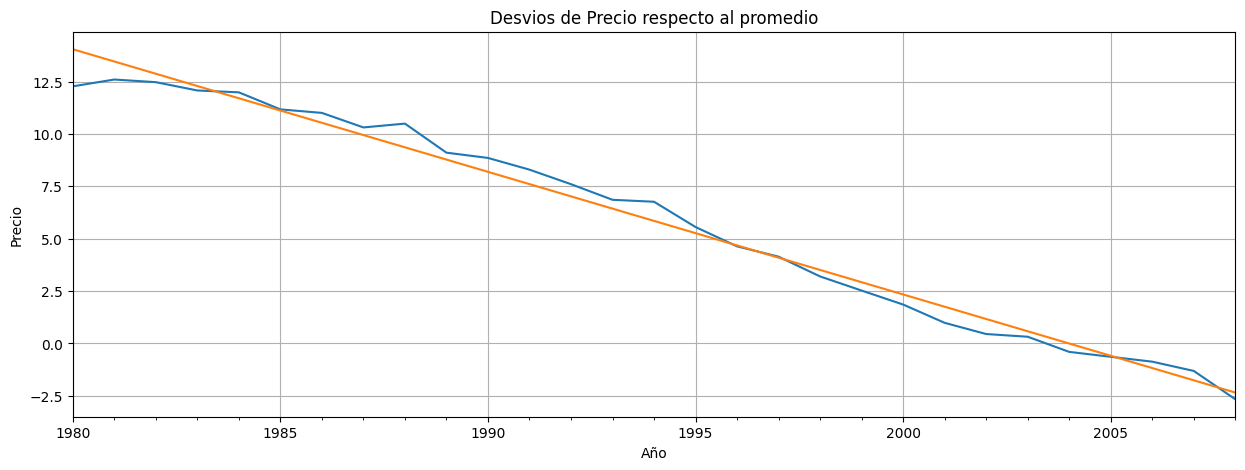

In [38]:
ax = log_prices.plot(xlabel="Time", ylabel="Price deviation", legend=False)
ax.plot(fit.fittedvalues)
plt.title("Desvios de Precio respecto al promedio")
plt.ylabel("Precio")
plt.xlabel("Año");

Text(0.5, 1.0, 'Residuos del ajuste')

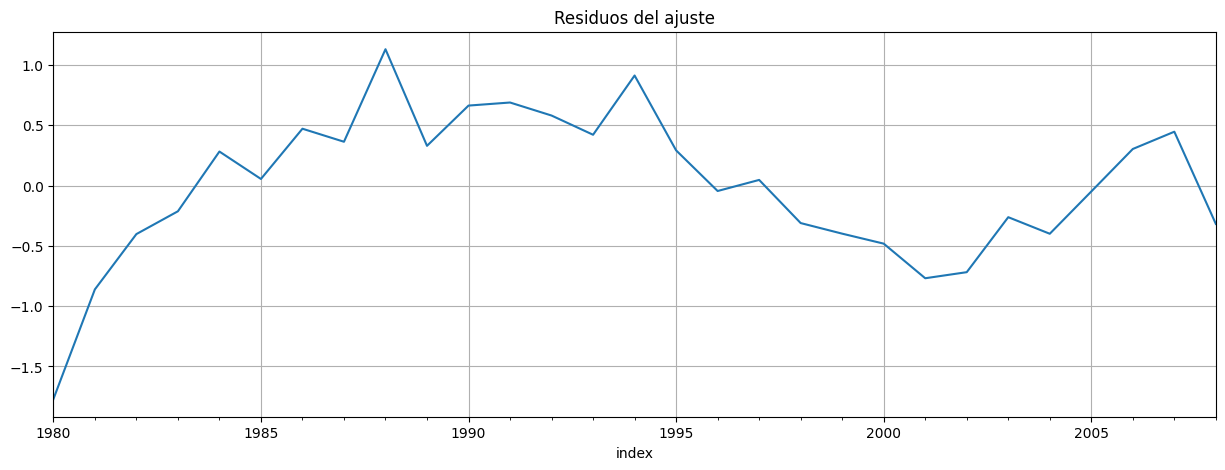

In [39]:
residuos = fit.resid
residuos.plot()
plt.title("Residuos del ajuste")

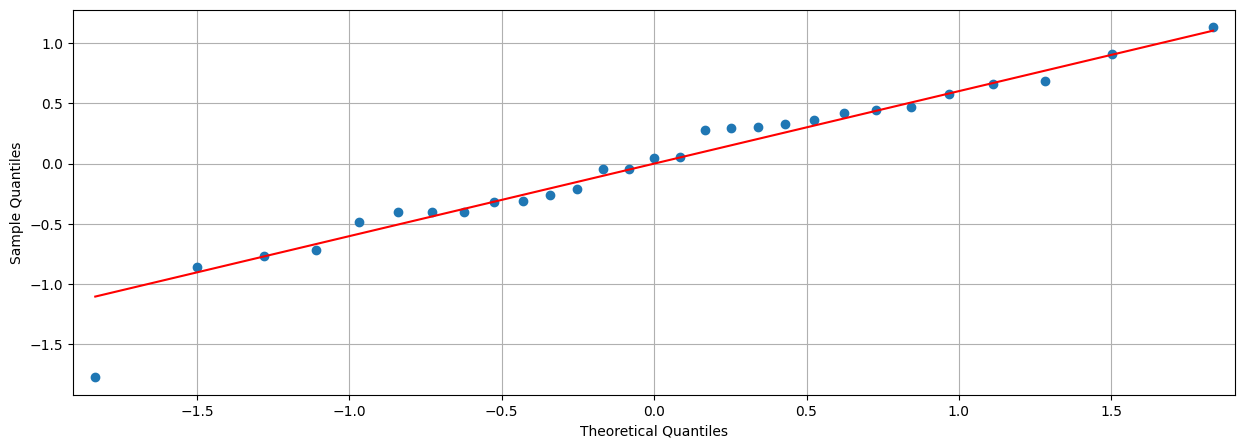

In [40]:
## QQ-plot es una verificación de gaussianidad.
sm.qqplot(residuos, line="s");

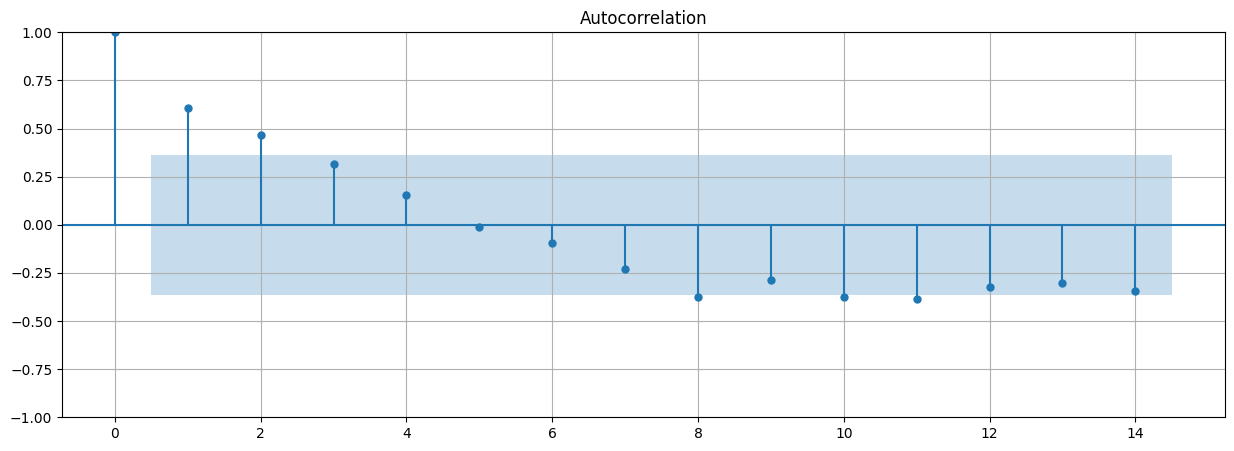

In [41]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuos, bartlett_confint=False);

Gráfico de los valores ajustados vs los valores reales:

Este gráfico nos muestra cómo de bien el modelo ajusta los datos reales.
Si los puntos azules (valores reales) están cerca de la línea ajustada (valores predichos), esto indica un buen ajuste.
Gráfico de los residuos:

Los residuos deben distribuirse aleatoriamente alrededor de cero.
Un patrón sistemático en los residuos puede indicar que el modelo no está capturando bien la estructura de los datos.
QQ-Plot de los residuos:

Este gráfico es una herramienta para evaluar la normalidad de los residuos.
Si los puntos se alinean aproximadamente a lo largo de la línea roja, los residuos son aproximadamente normales.
Desviaciones significativas de la línea indican que los residuos no son normales.
ACF de los residuos:

La función de autocorrelación de los residuos nos muestra si hay correlación entre los residuos en diferentes Lags.
Los residuos deben ser independientes, es decir, no deben mostrar autocorrelación significativa.
Análisis de los resultados:
Gráfico de valores ajustados:

Observando el primer gráfico, los valores reales (azul) y los valores ajustados (línea naranja) están bastante alineados. Esto sugiere que el modelo está capturando bien la tendencia general de los datos.
Gráfico de residuos:

En el segundo gráfico, los residuos parecen mostrar cierta estructura y no se distribuyen completamente de manera aleatoria alrededor de cero.
Esto sugiere que el modelo lineal puede no estar capturando toda la variabilidad en los datos.
QQ-Plot de los residuos:

El QQ-Plot muestra que los residuos siguen la línea teórica de una distribución normal bastante bien, aunque hay algunas desviaciones en los extremos.
Esto indica que, aunque los residuos son aproximadamente normales, hay algunas observaciones que se desvían de la normalidad.
ACF de los residuos:

El ACF muestra que hay autocorrelación significativa en los primeros Lags, lo cual es problemático.
La autocorrelación significativa indica que los residuos no son independientes, lo que sugiere que el modelo lineal no ha capturado toda la estructura temporal de los datos.
Conclusión:
Ajuste del modelo: Aunque el modelo lineal ajusta bien la tendencia general de los datos, los gráficos de residuos y la ACF sugieren que hay problemas con los residuos, indicando que el modelo podría mejorarse.
Normalidad de los residuos: Los residuos son aproximadamente normales, pero no completamente.
Independencia de los residuos: La autocorrelación en los residuos indica que el modelo no está capturando toda la dependencia temporal en los datos.
Recomendación: Dado que hay autocorrelación en los residuos, sería beneficioso considerar un modelo que pueda capturar mejor la estructura temporal, como un modelo ARIMA o un modelo de regresión con términos adicionales (por ejemplo, término cuadrático como se sugirió anteriormente).

5. Se propone agregar un término cuadrático (que corresponde a un decaimiento mayor a exponencial) a la regresión
anterior. Realice nuevamente el ajuste y compare con el anterior. ¿Cuál modelo le parece mejor?


Resumen del ajuste lineal:
                            OLS Regression Results                            
Dep. Variable:                 precio   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     1790.
Date:                Wed, 03 Jul 2024   Prob (F-statistic):           3.23e-26
Time:                        22:35:48   Log-Likelihood:                -26.396
No. Observations:                  29   AIC:                             56.79
Df Residuals:                      27   BIC:                             59.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.8914    

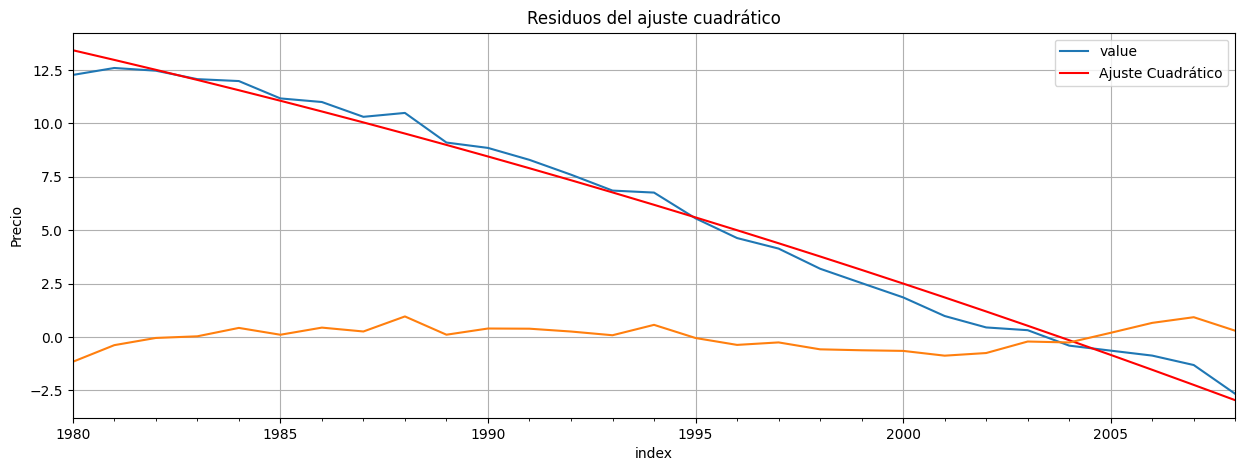

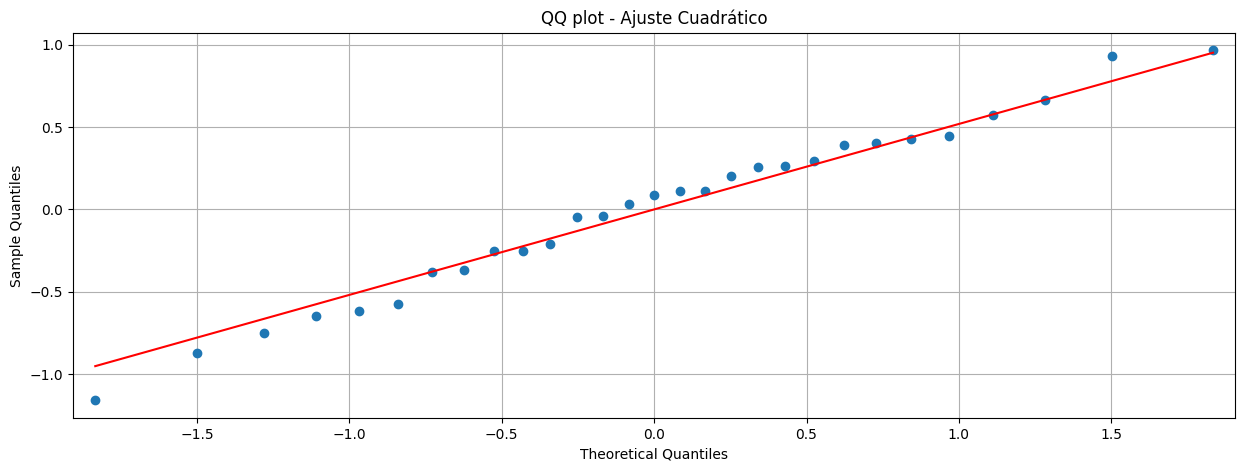

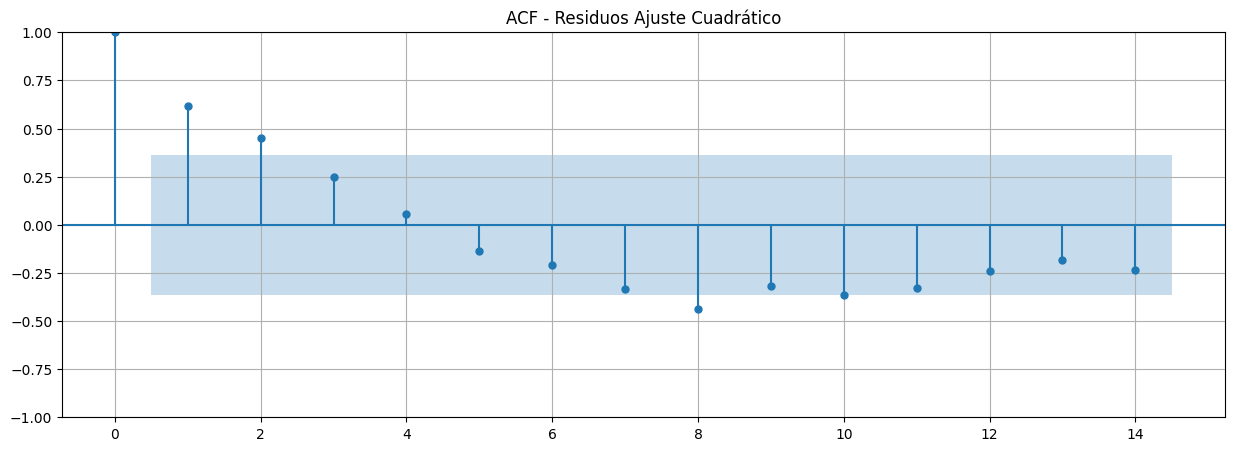

In [42]:
# Agregar el término cuadrático y realizar la regresión
time_squared = time ** 2
data_reg = pd.concat([time, time_squared, log_prices], axis=1)
data_reg.columns = ["time", "time_squared", "precio"]

# Ajuste con término cuadrático
fit_quadratic = ols(formula="precio ~ time + time_squared", data=data_reg).fit()

# Plot del ajuste cuadrático
ax = log_prices.plot(xlabel="Time", ylabel="Price deviation", legend=False)
ax.plot(fit_quadratic.fittedvalues, label="Ajuste Cuadrático", color='red')
plt.title("Desvios de Precio respecto al promedio - Ajuste Cuadrático")
plt.ylabel("Precio")
plt.xlabel("Año")
plt.legend()

# Residuos y QQ plot para el ajuste cuadrático
residuos_quadratic = fit_quadratic.resid
residuos_quadratic.plot()
plt.title("Residuos del ajuste cuadrático")
sm.qqplot(residuos_quadratic, line="s")
plt.title("QQ plot - Ajuste Cuadrático")

# ACF para los residuos del ajuste cuadrático
plot_acf(residuos_quadratic, bartlett_confint=False)
plt.title("ACF - Residuos Ajuste Cuadrático")

# Comparación de modelos
print("Resumen del ajuste lineal:")
print(fit.summary())
print("\nResumen del ajuste cuadrático:")
print(fit_quadratic.summary())


Comparar los dos modelos de regresión (lineal y cuadrático) requiere observar varias métricas y valores estadísticos de sus resultados para evaluar cuál modelo se ajusta mejor a los datos. A continuación, se analizan las métricas clave de ambos modelos:

1. R-squared y Adjusted R-squared:
Modelo Lineal:
R-squared: 0.985
Adjusted R-squared: 0.985
Modelo Cuadrático:
R-squared: 0.989
Adjusted R-squared: 0.988
El modelo cuadrático tiene un R-squared y un Adjusted R-squared ligeramente más altos, lo que sugiere que explica una mayor proporción de la variabilidad en la variable dependiente.

2. AIC (Akaike Information Criterion) y BIC (Bayesian Information Criterion):
Modelo Lineal:
AIC: 56.79
BIC: 59.53
Modelo Cuadrático:
AIC: 50.18
BIC: 54.29
El modelo cuadrático tiene valores de AIC y BIC más bajos, lo que indica un mejor balance entre ajuste y complejidad del modelo.

3. Significancia de los Coeficientes (P>|t|):
Modelo Lineal:
Intercepto: P>|t| = 0.000
Tiempo: P>|t| = 0.000
Modelo Cuadrático:
Intercepto: P>|t| = 0.000
Tiempo: P>|t| = 0.000
Tiempo^2: P>|t| = 0.006
Todos los coeficientes son significativos en ambos modelos (P < 0.05), pero en el modelo cuadrático, tanto el término lineal como el cuadrático son significativos.

4. Log-Likelihood:
Modelo Lineal:
Log-Likelihood: -26.396
Modelo Cuadrático:
Log-Likelihood: -22.092
El modelo cuadrático tiene un Log-Likelihood mayor, lo que indica un mejor ajuste.

*Pruebas Diagnósticas:*

5. Omnibus y Prob(Omnibus):
    Modelo Lineal: Omnibus = 4.198, Prob(Omnibus) = 0.123
    Modelo Cuadrático: Omnibus = 0.432, Prob(Omnibus) = 0.806

6. Durbin-Watson:
    Modelo Lineal: Durbin-Watson = 0.476
    Modelo Cuadrático: Durbin-Watson = 0.587

7. Jarque-Bera (JB) y Prob(JB):
    Modelo Lineal: JB = 2.584, Prob(JB) = 0.275
    Modelo Cuadrático: JB = 0.562, Prob(JB) = 0.755


El modelo cuadrático muestra mejores resultados en las pruebas de normalidad y autocorrelación de residuos, con valores de Prob(Omnibus) y Prob(JB) más altos (indicando residuos más normalmente distribuidos) y un Durbin-Watson más cercano a 2 (indicando menos autocorrelación).

Conclusión:
El modelo cuadrático parece ofrecer un mejor ajuste a los datos en comparación con el modelo lineal, como se evidencia por los valores más altos de R-squared y Adjusted R-squared, valores más bajos de AIC y BIC, mayor Log-Likelihood, y mejores resultados en las pruebas diagnósticas de residuos. Por lo tanto, es recomendable utilizar el modelo cuadrático para describir la relación entre las variables en este caso.










## Ejercicio 2

Se considera en primer lugar la serie `sales` de ventas de Oro en sudáfrica en el período Jul 1957 - Dic 1969. Se desea ajustar a dicha serie un modelo ARIMA adecuado.

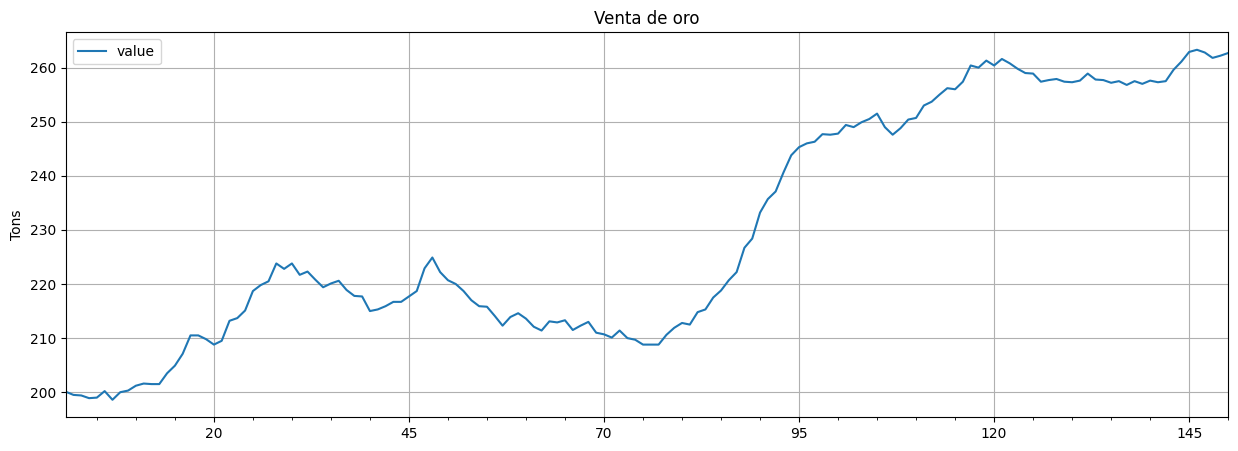

In [43]:
sales = astsa.sales
sales.plot()
plt.title("Venta de oro")
plt.ylabel("Tons");

In [44]:
sales.head()

,value
1,200.1
2,199.5
3,199.4
4,198.9
5,199.0


Se pide:

   1. Analizar la serie anterior: ¿es estacionaria? ¿Presenta alguna tendencia clara?
   2. Analice la serie de incrementos de $y_t$. ¿Puede decir que es estacionaria? ¿Cuál es el incremento medio?
   3. Realice un análisis de autocorrelación de la serie diferenciada y elija dos modelos de tipo ARMA adecuados           para la misma.
   4. Ajuste los modelos anteriores a la serie original `sales` (no olvide incluir el orden de integración $I$). Compare los resultados obtenidos analizando los residuos y la calidad del ajuste.
   5. Elija el modelo que le parezca más adecuado y realice una predicción para el año 1970 incluyendo intervalos de confianza.

   1. Analizar la serie anterior: ¿es estacionaria? ¿Presenta alguna tendencia clara?

   Tendencia:
La serie temporal claramente muestra una tendencia creciente a lo largo del tiempo, lo que sugiere que no es estacionaria en su nivel original.


Indicadores de no-estacionariedad:
Tendencia: Una tendencia ascendente o descendente a lo largo del tiempo indica que la serie no es estacionaria.
Estacionalidad: Patrones periódicos que se repiten a intervalos regulares sugieren estacionalidad.
Varianza no constante: Cambios en la amplitud de las fluctuaciones a lo largo del tiempo también indican no-estacionariedad.



Observaciones del gráfico proporcionado:

Tendencia: Hay una tendencia general ascendente desde aproximadamente 1962 hasta 1970. También hay una tendencia ascendente desde 1957 hasta 1960, seguida de una tendencia descendente hasta 1962.

Estacionalidad: No se observan patrones estacionales claros en este gráfico.

Varianza: La varianza parece ser más o menos constante, pero la tendencia dominante es más significativa.

Conclusión:
El gráfico muestra una tendencia clara en varios periodos (ascendente desde 1962 y otra más corta desde 1957 a 1960). Esto sugiere que la serie no es estacionaria. En una serie estacionaria, esperarías ver fluctuaciones alrededor de una media constante sin una tendencia evidente.

   2. Analice la serie de incrementos de $y_t$. ¿Puede decir que es estacionaria? ¿Cuál es el incremento medio?

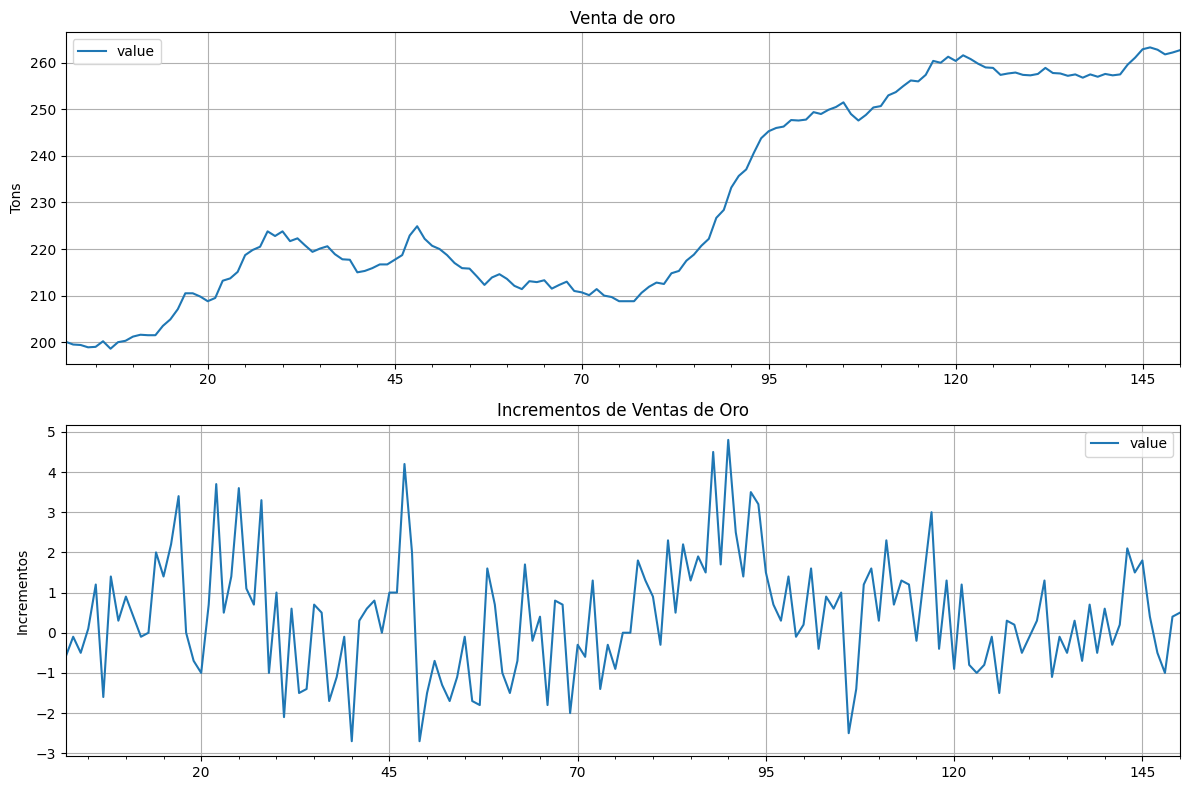

{'ADF Statistic': -3.7223342180525014, 'p-value': 0.0038097483290768985, 'Used Lag': 3, 'Number of Observations': 145, 'Critical Values': {'1%': -3.476273058920005, '5%': -2.881687616548444, '10%': -2.5775132580261593}, 'Mean Increment': value    0.420134
dtype: float64}


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Calcular los incrementos
sales_diff = sales.diff().dropna()

# Realizar la prueba ADF en la serie de incrementos
adf_result_diff = adfuller(sales_diff)

# Calcular el incremento medio
mean_increment = sales_diff.mean()

# Visualizar la serie original y la serie de incrementos
fig, axes = plt.subplots(2, 1, figsize=(12, 8))
sales.plot(ax=axes[0], title='Venta de oro', ylabel='Tons')
sales_diff.plot(ax=axes[1], title='Incrementos de Ventas de Oro', ylabel='Incrementos')

plt.tight_layout()
plt.show()

# Obtener todos los valores de la prueba ADF
adf_stat_diff = adf_result_diff[0]
p_value_diff = adf_result_diff[1]
used_lag_diff = adf_result_diff[2]
n_obs_diff = adf_result_diff[3]
critical_values_diff = adf_result_diff[4]

# Mostrar los resultados de la prueba ADF y el incremento medio
adf_results = {
    "ADF Statistic": adf_stat_diff,
    "p-value": p_value_diff,
    "Used Lag": used_lag_diff,
    "Number of Observations": n_obs_diff,
    "Critical Values": critical_values_diff,
    "Mean Increment": mean_increment
}

print(adf_results)


```python
Análisis de la Serie de Incrementos 
*yt*
​
 
Resultados de la Prueba Dickey-Fuller Aumentada (ADF):
Estadístico ADF: -3.7223
Valor p: 0.0038
Lags utilizados: 3
Número de observaciones: 145
Valores críticos:
1%: -3.4763
5%: -2.8817
10%: -2.5775
Interpretación:
El valor p de 0.0038 es menor que cualquier nivel de significancia común (0.01, 0.05, 0.10), lo que significa que podemos rechazar la hipótesis nula de que la serie tiene una raíz unitaria. Esto indica que la serie de incrementos es estacionaria.
Incremento Medio:
Incremento Medio: 0.4201 toneladas
Conclusión:
La serie de incrementos es estacionaria según la prueba ADF.
El incremento medio de las ventas de oro es de aproximadamente 0.4201 toneladas.
```

```python
Utiliza la serie temporal sales del módulo astsa.
Calcula los incrementos de la serie temporal.
Realiza la prueba Dickey-Fuller aumentada (ADF) en la serie de incrementos para verificar su estacionariedad.
Calcula el incremento medio de la serie.
Visualiza la serie original y la serie de incrementos.
Imprime los resultados de la prueba ADF y el incremento medio.
```

3. Realice un análisis de autocorrelación de la serie diferenciada y elija dos modelos de tipo ARMA adecuados           para la misma.

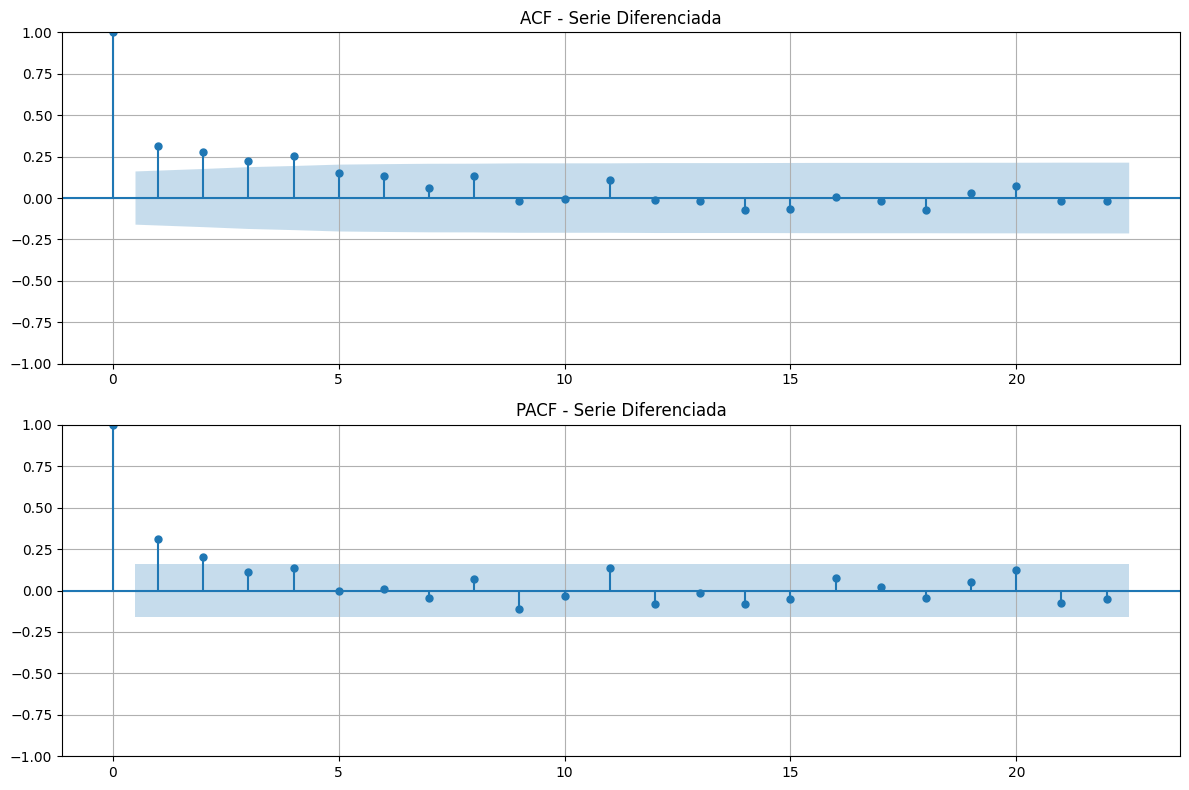

In [46]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Visualización de ACF y PACF de la serie diferenciada
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(sales_diff, ax=axes[0], title='ACF - Serie Diferenciada')
plot_pacf(sales_diff, ax=axes[1], title='PACF - Serie Diferenciada')

plt.tight_layout()
plt.show()




In [47]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

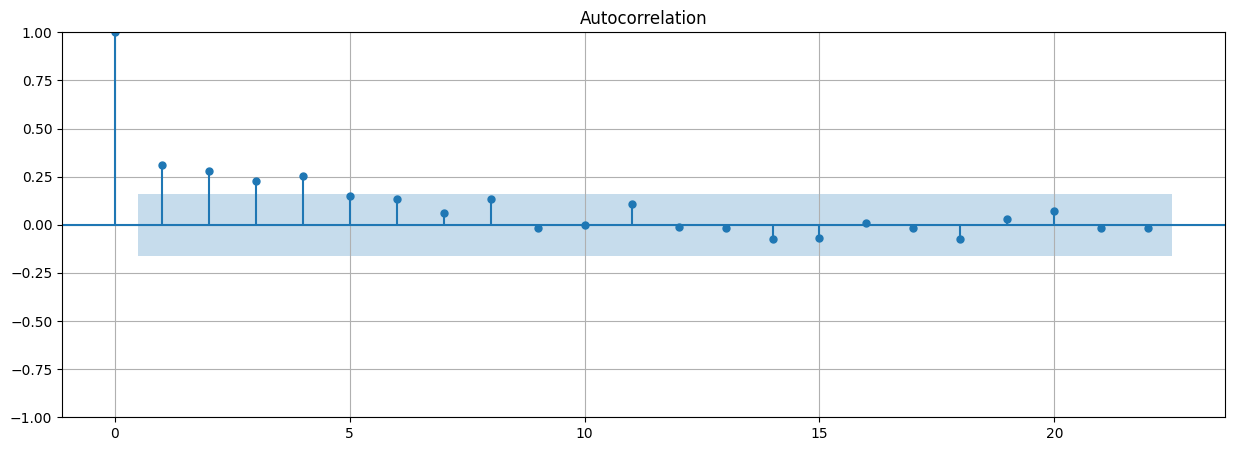

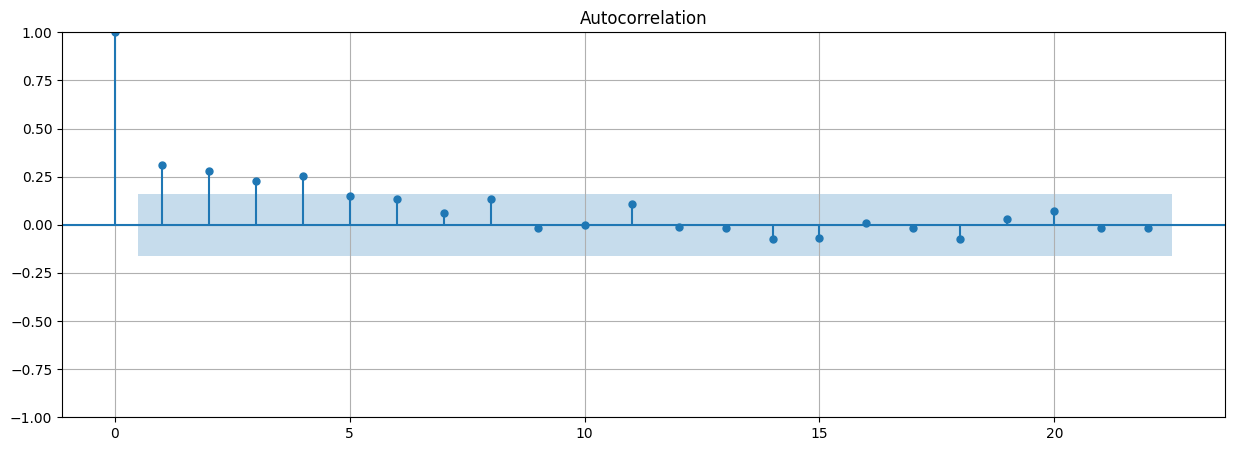

In [48]:

plot_acf(sales_diff, bartlett_confint=False)


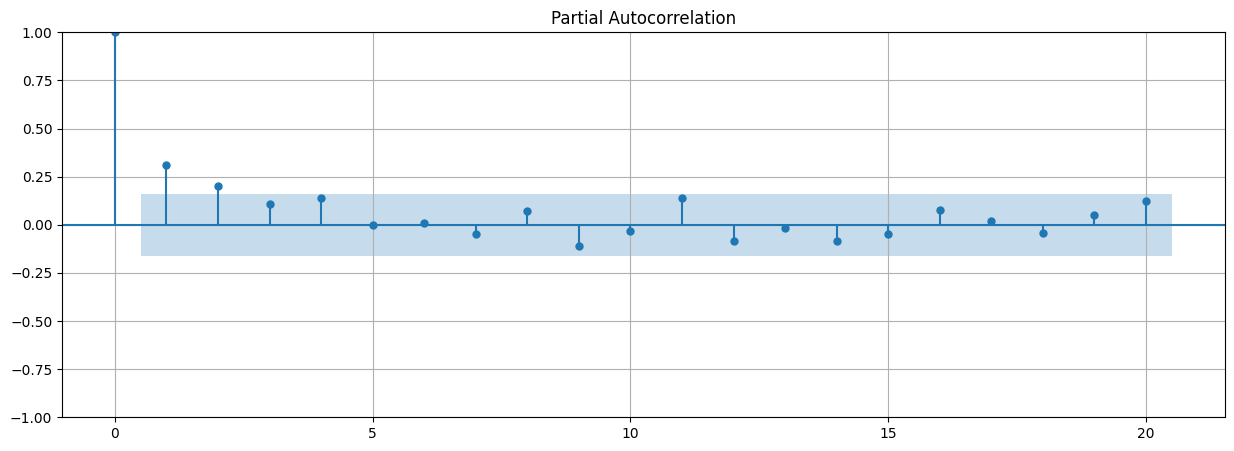

In [49]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

# Assuming 'sales_diff' is your differenced time series data
plot_pacf(sales_diff, lags=20, alpha=0.05)  # 95% confidence intervals using the default method
plt.show()

```python
Análisis de las Gráficas de ACF y PACF
Gráfica ACF (Función de Autocorrelación):
La ACF muestra la autocorrelación de la serie diferenciada en diferentes rezagos.
En la gráfica ACF, el primer rezago (lag 1) tiene una autocorrelación alta y significativa, y las autocorrelaciones posteriores disminuyen lentamente.
Esto sugiere que puede haber un componente MA (Moving Average) en la serie.
Gráfica PACF (Función de Autocorrelación Parcial):
La PACF muestra la autocorrelación parcial de la serie diferenciada en diferentes rezagos.
En la gráfica PACF, el primer rezago (lag 1) tiene una autocorrelación parcial alta y significativa, y luego decae rápidamente después del primer rezago.
Esto sugiere que puede haber un componente AR (Autoregressive) en la serie.
Interpretación para Selección de Modelos ARMA:
ACF: La alta autocorrelación en el primer rezago sugiere un componente MA(1).
PACF: La alta autocorrelación parcial en el primer rezago sugiere un componente AR(1).
Modelos Sugeridos:
ARMA(1,1): Un modelo con un término AR y un término MA.
ARMA(2,1) o ARMA(1,2): Si se desea un modelo ligeramente más complejo para capturar más patrones.
Ajuste de los Modelos y Evaluación:
Voy a ajustar los modelos ARMA(1,1) y ARMA(2,1) a la serie diferenciada y mostrar sus resúmenes.
```

In [50]:
# Basado en las gráficas ACF y PACF, seleccionaremos dos modelos ARMA
# Ajuste del primer modelo ARMA usando ARIMA con d=0
arma_model_1 = sm.tsa.ARIMA(sales_diff, order=(1, 0, 1)).fit()

# Ajuste del segundo modelo ARMA usando ARIMA con d=0
arma_model_2 = sm.tsa.ARIMA(sales_diff, order=(2, 0, 2)).fit()

# Resúmenes de los modelos
arma_model_1_summary = arma_model_1.summary()
arma_model_2_summary = arma_model_2.summary()

print(arma_model_1_summary)
print(arma_model_2_summary)

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  149
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -253.392
Date:                Wed, 03 Jul 2024   AIC                            514.784
Time:                        22:35:50   BIC                            526.799
Sample:                      12-31-02   HQIC                           519.665
                          - 12-31-150                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4001      0.272      1.470      0.142      -0.133       0.934
ar.L1          0.8381      0.104      8.091      0.000       0.635       1.041
ma.L1         -0.6097      0.158     -3.857      0.0

```python
Análisis de los Modelos ARMA Ajustados
Modelo ARMA(1,1):
Log Likelihood: -253.392
AIC: 514.784
BIC: 526.799
HQIC: 519.665
Coeficientes:

Constante (const): 0.4001 (p-valor = 0.142)
AR(1): 0.8381 (p-valor < 0.001, significativo)
MA(1): -0.6097 (p-valor < 0.001, significativo)
Sigma2: 1.7536 (p-valor < 0.001, significativo)
Pruebas Diagnósticas:

Ljung-Box (L1) (Q): 0.05 (Prob(Q) = 0.83, no significativo)
Jarque-Bera (JB): 1.32 (Prob(JB) = 0.52, no significativo)
Heteroskedasticity (H): 0.49 (Prob(H) = 0.01, significativo)


Modelo ARMA(2,2):
Log Likelihood: -253.079
AIC: 518.159
BIC: 536.183
HQIC: 525.482
Coeficientes:

Constante (const): 0.4003 (p-valor = 0.141)
AR(1): -0.0208 (p-valor = 0.961, no significativo)
AR(2): 0.7038 (p-valor = 0.060, marginalmente significativo)
MA(1): 0.2316 (p-valor = 0.621, no significativo)
MA(2): -0.4734 (p-valor = 0.150, no significativo)
Sigma2: 1.7461 (p-valor < 0.001, significativo)
Pruebas Diagnósticas:

Ljung-Box (L1) (Q): 0.00 (Prob(Q) = 0.96, no significativo)
Jarque-Bera (JB): 1.37 (Prob(JB) = 0.51, no significativo)
Heteroskedasticity (H): 0.48 (Prob(H) = 0.01, significativo)
Interpretación y Comparación:
Ajuste del Modelo (AIC/BIC):

El modelo ARMA(1,1) tiene un AIC y BIC más bajos que el modelo ARMA(2,2), lo que indica que el modelo ARMA(1,1) es preferible en términos de ajuste general.
Significancia de los Coeficientes:

En el modelo ARMA(1,1), tanto el término AR(1) como el término MA(1) son significativos.
En el modelo ARMA(2,2), los coeficientes de AR(1) y MA(1) no son significativos, y el coeficiente de AR(2) es solo marginalmente significativo.
Pruebas Diagnósticas:

Ambos modelos pasan la prueba de Ljung-Box y Jarque-Bera, lo que indica que los residuos no tienen autocorrelación significativa y son aproximadamente normales.
Ambos modelos muestran heterocedasticidad significativa, lo que sugiere que podría haber variabilidad no constante en los residuos que no está siendo capturada por el modelo.
Conclusión:
Modelo ARMA(1,1): Este modelo es más parsimonioso con un mejor ajuste (menores AIC y BIC) y tiene coeficientes significativos para los términos AR y MA. Por lo tanto, este modelo es preferible en términos de simplicidad y ajuste general.
Modelo ARMA(2,2): Aunque es un modelo más complejo, los coeficientes no son significativos, y tiene un AIC y BIC más altos. Por lo tanto, no es tan preferible como el ARMA(1,1).
En resumen, el modelo ARMA(1,1) es el modelo recomendado para la serie diferenciada.
```

   4. Ajuste los modelos anteriores a la serie original `sales` (no olvide incluir el orden de integración $I$). Compare los resultados obtenidos analizando los residuos y la calidad del ajuste.

In [51]:
# Basado en las gráficas ACF y PACF, seleccionaremos dos modelos ARMA
# Ajuste del primer modelo ARMA usando ARIMA con d=1
arma_model_1_I = sm.tsa.ARIMA(sales, order=(1, 1, 1)).fit()

# Ajuste del segundo modelo ARMA usando ARIMA con d=1
arma_model_2_I = sm.tsa.ARIMA(sales, order=(2, 1, 2)).fit()

# Resúmenes de los modelos
arma_model_1_I_summary = arma_model_1_I.summary()
arma_model_2_I_summary = arma_model_2_I.summary()

print(arma_model_1_I_summary)
print(arma_model_2_I_summary)

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  150
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -254.368
Date:                Wed, 03 Jul 2024   AIC                            514.736
Time:                        22:35:50   BIC                            523.748
Sample:                      12-31-01   HQIC                           518.397
                          - 12-31-150                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8799      0.076     11.644      0.000       0.732       1.028
ma.L1         -0.6415      0.131     -4.889      0.000      -0.899      -0.384
sigma2         1.7755      0.191      9.287      0.0

```python
Para comparar los cuatro modelos SARIMAX proporcionados, analizaremos métricas clave como el AIC (Criterio de Información de Akaike), BIC (Criterio de Información Bayesiano), Log Likelihood y la significancia estadística de los parámetros del modelo. Aquí está un resumen de los resultados clave:

Resúmenes de Modelos:
Modelo 1: ARIMA(1, 1, 1)
Log Likelihood: -254.368
AIC: 514.736
BIC: 523.748
HQIC: 518.397
Coeficientes Significativos: ar.L1 (0.8799, p=0.000), ma.L1 (-0.6415, p=0.000)
Modelo 2: ARIMA(2, 1, 2)
Log Likelihood: -254.077
AIC: 518.155
BIC: 533.175
HQIC: 524.257
Coeficientes Significativos: Ninguno (ar.L2 cercano con p=0.052)
Modelo 3: ARIMA(1, 0, 1)
Log Likelihood: -253.392
AIC: 514.784
BIC: 526.799
HQIC: 519.665
Coeficientes Significativos: ar.L1 (0.8381, p=0.000), ma.L1 (-0.6097, p=0.000)
Modelo 4: ARIMA(2, 0, 2)
Log Likelihood: -253.079
AIC: 518.159
BIC: 536.183
HQIC: 525.482
Coeficientes Significativos: Ninguno (ar.L2 cercano con p=0.060)
Comparación e Interpretación:
Log Likelihood:

El log likelihood más alto indica el mejor ajuste entre los modelos. El Modelo 4 (ARIMA(2, 0, 2)) tiene el log likelihood más alto (-253.079), seguido de cerca por el Modelo 3 (ARIMA(1, 0, 1)).
AIC:

Un AIC más bajo indica un mejor modelo con un buen equilibrio entre ajuste y complejidad. El Modelo 1 (ARIMA(1, 1, 1)) tiene el AIC más bajo (514.736), muy cerca del Modelo 3 (514.784).
BIC:

Un BIC más bajo es preferible para la selección de modelos. El Modelo 1 (ARIMA(1, 1, 1)) tiene el BIC más bajo (523.748).
Coeficientes Significativos:

Los Modelos 1 y 3 tienen coeficientes AR y MA significativos, lo que indica parámetros significativos.
Conclusión:
Mejor Modelo: ARIMA(1, 1, 1) (Modelo 1) destaca con el AIC y BIC más bajos, junto con coeficientes significativos. Este modelo sugiere que una diferenciación de primer orden (d=1) es adecuada para la serie, capturando efectivamente los componentes autorregresivos y de media móvil.
Segundo Mejor Modelo: ARIMA(1, 0, 1) (Modelo 3) está muy cerca en términos de AIC y tiene coeficientes significativos, pero la falta de diferenciación podría sugerir que es menos adecuado para las propiedades de tendencia/estacionaridad de los datos.
Dadas las métricas y la significancia de los coeficientes, se recomienda el Modelo 1 (ARIMA(1, 1, 1)) como el mejor modelo para este conjunto de datos.
```

## Definiciones

```python
Valores y su Significado:
Log Likelihood (Log Verosimilitud):

Significado: Mide qué tan bien se ajusta el modelo a los datos. Un valor más alto (menos negativo) indica un mejor ajuste.
Significativo cuando: No tiene un umbral de significancia en sí mismo, pero se utiliza para calcular AIC y BIC.
AIC (Criterio de Información de Akaike):

Significado: Evalúa la calidad del modelo, penalizando la complejidad del modelo (número de parámetros). Un valor más bajo indica un mejor modelo.
Significativo cuando: Se compara entre modelos; el modelo con el AIC más bajo se considera mejor.
BIC (Criterio de Información Bayesiano):

Significado: Similar al AIC pero penaliza los modelos más complejos más fuertemente. Un valor más bajo indica un mejor modelo.
Significativo cuando: Se compara entre modelos; el modelo con el BIC más bajo se considera mejor.
HQIC (Criterio de Información de Hannan-Quinn):

Significado: Evalúa la calidad del modelo con una penalización diferente para la complejidad del modelo. Un valor más bajo indica un mejor modelo.
Significativo cuando: Se compara entre modelos; el modelo con el HQIC más bajo se considera mejor.
Coeficientes (ar.L1, ar.L2, ma.L1, ma.L2, const, sigma2):

Significado: Representan los parámetros del modelo ARIMA.
ar.L1: Coeficiente de autoregresión de primer orden.
ar.L2: Coeficiente de autoregresión de segundo orden.
ma.L1: Coeficiente de media móvil de primer orden.
ma.L2: Coeficiente de media móvil de segundo orden.
const: Constante del modelo (solo en modelos sin diferenciación).
sigma2: Varianza del error residual.
Significativo cuando: El valor p (P>|z|) es menor que un umbral típico como 0.05. Esto indica que el coeficiente es estadísticamente significativo y tiene un impacto notable en el modelo.
Ljung-Box (L1) (Q):

Significado: Prueba de independencia de residuos. Un valor Q bajo con una probabilidad (Prob(Q)) alta indica que los residuos son independientes.
Significativo cuando: La Prob(Q) es alta (típicamente mayor que 0.05), indicando que no hay autocorrelación significativa en los residuos.
Jarque-Bera (JB):

Significado: Prueba de normalidad de los residuos. Un valor JB bajo con una Prob(JB) alta indica que los residuos son normalmente distribuidos.
Significativo cuando: La Prob(JB) es alta (típicamente mayor que 0.05), indicando que los residuos son normalmente distribuidos.
Heteroskedasticity (H):

Significado: Prueba de homocedasticidad de los residuos. Un valor H bajo con una Prob(H) alta indica que los residuos tienen varianza constante.
Significativo cuando: La Prob(H) es alta (típicamente mayor que 0.05), indicando que no hay heterocedasticidad significativa en los residuos.
Skew:

Significado: Medida de asimetría de la distribución de residuos.
Significativo cuando: No hay un umbral específico, pero valores cercanos a 0 indican una distribución simétrica.
Kurtosis:

Significado: Medida de la "apuntalamiento" de la distribución de residuos.
Significativo cuando: No hay un umbral específico, pero valores cercanos a 3 indican una distribución normal.
Resumen de Significancia:
Los coeficientes son significativos si su valor p (P>|z|) es menor que 0.05.
AIC, BIC y HQIC se utilizan para comparar modelos, siendo el modelo con los valores más bajos el preferido.
Log Likelihood se usa como un indicador general del ajuste del modelo.
Ljung-Box, Jarque-Bera y Heteroskedasticity prueban la independencia, normalidad y homocedasticidad de los residuos, respectivamente, y son significativos si sus probabilidades asociadas son mayores a 0.05.
Espero que esto te sea útil. Si necesitas más detalles o alguna otra explicación, no dudes en pedirlo.
```

##   5. Elija el modelo que le parezca más adecuado y realice una predicción para el año 1970 incluyendo intervalos de confianza.

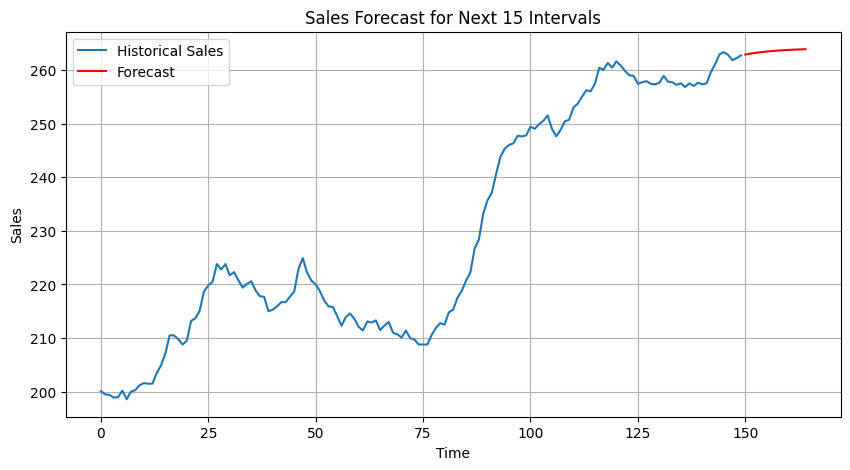

In [52]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Fit ARIMA model
arma_model_1_I = sm.tsa.ARIMA(sales, order=(1, 1, 1)).fit()

# Forecast the next 15 intervals
forecast = arma_model_1_I.forecast(steps=15)

# Ensure the index is an integer range for plotting
sales_index = range(len(sales))
forecast_index = range(len(sales), len(sales) + 15)

# Plot the forecast
plt.figure(figsize=(10, 5))
plt.plot(sales_index, sales, label='Historical Sales')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.legend()
plt.title('Sales Forecast for Next 15 Intervals')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.grid(True)
plt.show()



## Ejercicio 3

A la serie anterior de sales se le agrega ahora el indicador de precio del oro en el mercado internacional, dado por la serie
lead .

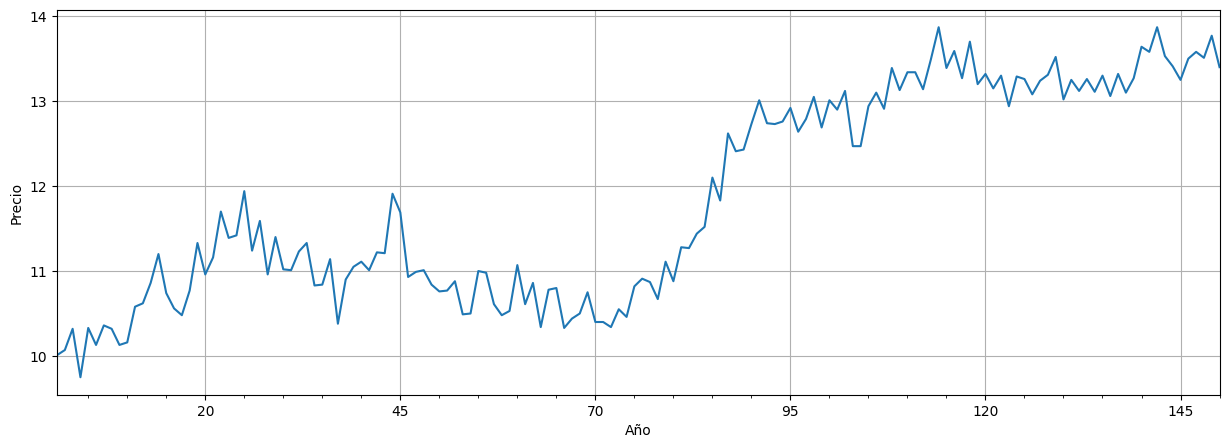

In [57]:
plt.rcParams['figure.figsize'] = [15,5]
plt.rcParams['axes.grid'] = True


lead = astsa.lead
lead.plot(xlabel="Año", ylabel="Precio", legend=False)

1. Realice un modelo lineal que intente explicar el valor de ( sales ) directamente a partir del valor de ( lead ) y
analice el resultado

In [58]:
data = pd.concat([sales, lead], axis=1).dropna()
data.columns = ["sales", "lead"]

fit = ols("sales ~ lead", data=data).fit()
print(f"MSE de los residuos: {fit.mse_resid}")
fit.summary()

MSE de los residuos: 44.13767786868573


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1410.
Date:                Wed, 03 Jul 2024   Prob (F-statistic):           1.57e-77
Time:                        22:44:00   Log-Likelihood:                -495.88
No. Observations:                 150   AIC:                             995.8
Df Residuals:                     148   BIC:                             1002.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.8812      5.331      5.793      0.000      20.347      41.415
lead          16.8060      0.448     37.544      0.000      15.921      17.691
==============================================================================
Omnibus:                        6.970   Durbin-Watson:                   0.688
Prob(Omnibus):                  0.031   Jarque-Bera (JB):                7.228
Skew:                          -0.533   Prob(JB):                       0.0269
Kurtosis:                       2.859   Cond. No.                         118.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

```python

Resultados del Modelo de Regresión Lineal (OLS)
Variable Dependiente (Dep. Variable): sales
R-cuadrado (R-squared): 0.905
R-cuadrado Ajustado (Adj. R-squared): 0.904
Número de Observaciones (No. Observations): 150
Grados de Libertad del Modelo (Df Model): 1
Grados de Libertad de los Residuales (Df Residuals): 148
Parámetros del Modelo
Intercepto: 30.8812

Error Estándar (std err): 5.331
t: 5.793
P>|t|: 0.000
Intervalo de Confianza (95%): [20.347, 41.415]
Coeficiente de lead: 16.8060

Error Estándar (std err): 0.448
t: 37.544
P>|t|: 0.000
Intervalo de Confianza (95%): [15.921, 17.691]
Estadísticas de Diagnóstico
Estadística F (F-statistic): 1410
Prob (F-statistic): 1.57e-77
Log-Likelihood: -495.88
AIC (Akaike Information Criterion): 995.8
BIC (Bayesian Information Criterion): 1002.0
Durbin-Watson: 0.688
Omnibus: 6.970
Prob(Omnibus): 0.031
Jarque-Bera (JB): 7.228
Prob(JB): 0.0269
Skew: -0.533
Kurtosis: 2.859
Cond. No. (Condition Number): 118
Interpretación de los Resultados
Coeficiente de lead:

Interpretación: El coeficiente de lead es 16.8060, lo que indica que por cada unidad de incremento en lead, las ventas (sales) aumentan en promedio 16.8060 unidades, manteniendo constante el resto de las variables.
Significancia: El p-valor asociado (0.000) es muy pequeño, indicando que el coeficiente es altamente significativo. Esto significa que hay una relación significativa entre lead y sales.
Intercepto:

Interpretación: El valor del intercepto es 30.8812. Esto representa el valor esperado de sales cuando lead es 0.
Significancia: El p-valor para el intercepto es 0.000, lo que indica que también es significativamente diferente de cero.
R-cuadrado:

Interpretación: El R-cuadrado de 0.905 indica que aproximadamente el 90.5% de la variabilidad en sales puede ser explicada por lead. Esto sugiere un buen ajuste del modelo.
Estadística F:

Interpretación: La estadística F de 1410 y su p-valor extremadamente bajo (1.57e-77) indican que el modelo en su conjunto es significativo. Esto significa que lead proporciona una cantidad significativa de información para predecir sales.
Diagnósticos de Residuos:

Durbin-Watson: Un valor de 0.688 sugiere la presencia de autocorrelación positiva en los residuos.
Omnibus y Jarque-Bera: Ambos tests sugieren que los residuos no siguen una distribución normal (p-valores < 0.05).
Skewness y Kurtosis: Skewness negativa (-0.533) indica que los residuos están ligeramente sesgados a la izquierda, y kurtosis (2.859) cercana a 3 indica que la distribución de los residuos es aproximadamente mesocúrtica.
Conclusión
El modelo lineal ajustado muestra que lead es un predictor significativo de sales, explicando una gran proporción de la variabilidad en sales. Sin embargo, la autocorrelación en los residuos y las pruebas de normalidad sugieren que puede ser necesario revisar los supuestos del modelo o considerar un modelo más complejo para mejorar el ajuste y las inferencias.

2. Se puede suponer que las producción (y por consiguiente las ventas) aumentan al aumentar el precio, pero con retardo.
para ello se propone.

A. Considerar las series y de incrementos de ventas y precio respectivamente.

B. Realizar un análisis de correlación cruzada entre los mismos, y encontrar el lag entre las series que produce mayor
correlación

In [59]:
sales_diff = sales.diff().dropna()
lead_diff = lead.diff().dropna()

# Alineamos las series para asegurar que tengan la misma longitud después de diferenciar
data_diff = pd.concat([sales_diff, lead_diff], axis=1).dropna()
data_diff.columns = ["sales_diff", "lead_diff"]

# Mostrar las primeras filas de las series de diferencias para verificar
print(data_diff.head())

   sales_diff  lead_diff
2        -0.6       0.06
3        -0.1       0.25
4        -0.5      -0.57
5         0.1       0.58
6         1.2      -0.20


   sales_diff  lead_diff
2        -0.6       0.06
3        -0.1       0.25
4        -0.5      -0.57
5         0.1       0.58
6         1.2      -0.20


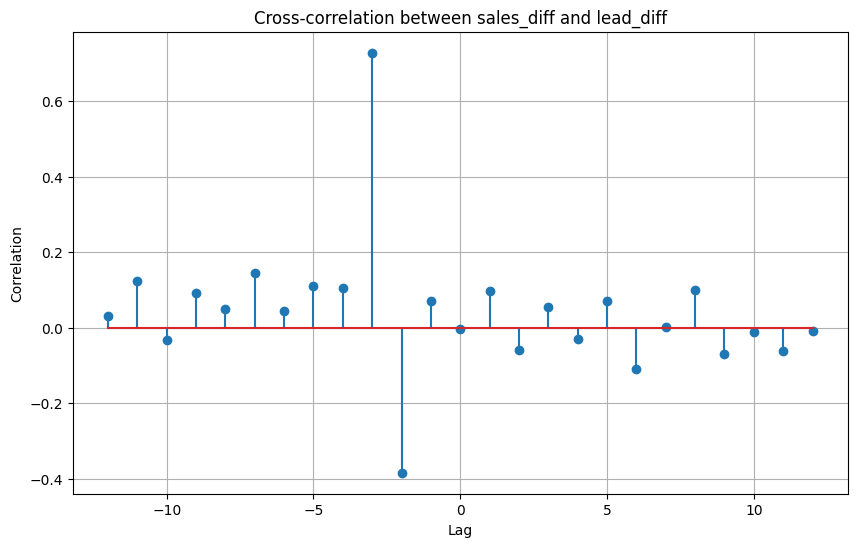

El lag con la mayor correlación es: -3


In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongo que sales y lead ya están definidos como pandas Series.

# Calculamos las diferencias (incrementos) de ventas y precio
sales_diff = sales.diff().dropna()
lead_diff = lead.diff().dropna()

# Alineamos las series para asegurar que tengan la misma longitud después de diferenciar
data_diff = pd.concat([sales_diff, lead_diff], axis=1).dropna()
data_diff.columns = ["sales_diff", "lead_diff"]

# Mostrar las primeras filas de las series de diferencias para verificar
print(data_diff.head())

# Función para calcular la correlación cruzada
def cross_corr(series1, series2, lag_max):
    result = []
    for lag in range(-lag_max, lag_max + 1):
        if lag < 0:
            result.append(series1.corr(series2.shift(-lag)))
        else:
            result.append(series1.shift(lag).corr(series2))
    return result

# Máximo lag a considerar
lag_max = 12  # Puedes ajustar este valor según tus necesidades

# Calcular la correlación cruzada
cross_corr_values = cross_corr(data_diff["sales_diff"], data_diff["lead_diff"], lag_max)

# Encontrar el lag con la mayor correlación
max_corr_lag = (cross_corr_values.index(max(cross_corr_values)) - lag_max)

# Plotear la correlación cruzada
lags = range(-lag_max, lag_max + 1)
plt.figure(figsize=(10, 6))
plt.stem(lags, cross_corr_values)
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.title('Cross-correlation between sales_diff and lead_diff')
plt.show()

print(f"El lag con la mayor correlación es: {max_corr_lag}")



3. Con el lag obtenido, volver a realizar el ajuste de pero con la serie laggeada y comparar con la parte 1. Graficar
adecuadamente el resultado.


In [67]:
import pandas as pd
import statsmodels.formula.api as ols
import matplotlib.pyplot as plt

# Supongo que sales y lead ya están definidos como pandas Series.

# Crear la serie laggeada con el lag obtenido (-3)
lead_lagged = lead.shift(-3).dropna()

# Alinear sales con los índices de lead_lagged
sales_lagged = sales.loc[lead_lagged.index]

# Verificar las series laggeadas
print(sales_lagged.head())
print(lead_lagged.head())



   value
1  200.1
2  199.5
3  199.4
4  198.9
5  199.0
   value
1   9.75
2  10.33
3  10.13
4  10.36
5  10.32


In [70]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Concatenar los datos y eliminar valores NaN
data_lagged = pd.concat([sales_lagged, lead_lagged], axis=1).dropna()
data_lagged.columns = ["sales", "lead_lagged"]

# Ajustar el modelo de regresión
fit_lagged = smf.ols("sales ~ lead_lagged", data=data_lagged).fit()

# Mostrar el resumen del nuevo ajuste
print(f"MSE de los residuos con lag: {fit_lagged.mse_resid}")
print(fit_lagged.summary())



MSE de los residuos con lag: 70.28483069363888
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     787.8
Date:                Wed, 03 Jul 2024   Prob (F-statistic):           1.77e-60
Time:                        23:08:17   Log-Likelihood:                -520.14
No. Observations:                 147   AIC:                             1044.
Df Residuals:                     145   BIC:                             1050.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Int

In [71]:
data = pd.concat([sales, lead], axis=1).dropna()
data.columns = ["sales", "lead"]
fit_original = smf.ols("sales ~ lead", data=data).fit()

print(f"MSE de los residuos original: {fit_original.mse_resid}")
print(fit_original.summary())


MSE de los residuos original: 44.13767786868573
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1410.
Date:                Wed, 03 Jul 2024   Prob (F-statistic):           1.57e-77
Time:                        23:08:29   Log-Likelihood:                -495.88
No. Observations:                 150   AIC:                             995.8
Df Residuals:                     148   BIC:                             1002.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Inte